In [1]:
from utils import *
import os.path
from tqdm import tqdm
import polars as pl

In [2]:
save_dir = 'scale_problem'
create_directory_if_not_exist(save_dir)

In [3]:
problem_dim = 5
n_runs = 30
n_evals = 1000
seed=42
n_instance_reapets = 3

In [4]:
suite = list(generate_scaled_problems(problem_dim=problem_dim, seed=seed, n_runs=n_instance_reapets))

In [5]:
runs_dir = f'{save_dir}/runs'
create_directory_if_not_exist(runs_dir)

In [6]:
features = df = pl.read_parquet(f'{save_dir}/dummy/*').sort(["problem", "instance", "scale"])
features

y_max_minus_min,problem,instance,scale
f64,i64,i64,f64
0.01441,1,1,0.0001
0.015118,1,1,0.000103
0.015961,1,1,0.000106
0.015177,1,1,0.000108
0.016447,1,1,0.000113
…,…,…,…
220048.000448,24,15,811.795481
224173.617857,24,15,835.899056
224117.700939,24,15,852.555048


In [7]:
def get_ranks(pdf, algorithms=["GA", "PSO", "DE", "CMAES", "ES"]):
    n = pdf.select(algorithms).to_pandas().rank(axis=1)
    pdf = pdf.with_columns([
        pl.Series(f"{a}_rank", n[a]) for a in algorithms
    ])
    return pdf

def get_precision(pdf, algorithms=["GA", "PSO", "DE", "CMAES", "ES"]):
    pdf = pdf.with_columns([
        (pl.col(a)-pl.col('optimum')).alias(f'{a}_precision') for a in algorithms
    ])
    return pdf
    

df = pl.read_parquet(f'{runs_dir}/*')
df

GA,PSO,DE,CMAES,ES,algorithm_run,problem,instance,scale,optimum
f64,f64,f64,f64,f64,i64,i32,i32,f64,f64
0.164637,0.1273,0.15169,0.119391,0.125412,0,10,10,0.000119,0.119391
0.135672,0.145124,0.136216,0.119391,0.131705,1,10,10,0.000119,0.119391
0.317469,0.12725,0.121302,0.119391,0.122921,2,10,10,0.000119,0.119391
0.130093,0.127805,0.130408,0.119391,0.128219,3,10,10,0.000119,0.119391
0.128285,0.126903,0.138017,0.119391,0.128319,4,10,10,0.000119,0.119391
…,…,…,…,…,…,…,…,…,…
1050.742293,1084.193725,1065.213164,1040.38329,1058.135285,95,9,9,9.942501,1040.38329
1060.138073,1044.982033,1061.235837,1040.38329,1047.727064,96,9,9,9.942501,1040.38329
1069.336704,1086.676315,1061.176867,1040.38329,1046.781001,97,9,9,9.942501,1040.38329


In [8]:
df = get_precision(get_ranks(df))
df

GA,PSO,DE,CMAES,ES,algorithm_run,problem,instance,scale,optimum,GA_rank,PSO_rank,DE_rank,CMAES_rank,ES_rank,GA_precision,PSO_precision,DE_precision,CMAES_precision,ES_precision
f64,f64,f64,f64,f64,i64,i32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.164637,0.1273,0.15169,0.119391,0.125412,0,10,10,0.000119,0.119391,5.0,3.0,4.0,1.0,2.0,0.045246,0.007909,0.032299,5.1209e-15,0.006021
0.135672,0.145124,0.136216,0.119391,0.131705,1,10,10,0.000119,0.119391,3.0,5.0,4.0,1.0,2.0,0.016281,0.025734,0.016825,7.7993e-15,0.012314
0.317469,0.12725,0.121302,0.119391,0.122921,2,10,10,0.000119,0.119391,5.0,4.0,2.0,1.0,3.0,0.198079,0.007859,0.001911,6.8140e-15,0.00353
0.130093,0.127805,0.130408,0.119391,0.128219,3,10,10,0.000119,0.119391,4.0,2.0,5.0,1.0,3.0,0.010703,0.008415,0.011017,1.2074e-15,0.008828
0.128285,0.126903,0.138017,0.119391,0.128319,4,10,10,0.000119,0.119391,3.0,2.0,5.0,1.0,4.0,0.008894,0.007513,0.018626,8.4377e-15,0.008928
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1050.742293,1084.193725,1065.213164,1040.38329,1058.135285,95,9,9,9.942501,1040.38329,2.0,5.0,4.0,1.0,3.0,10.359003,43.810435,24.829873,0.0,17.751994
1060.138073,1044.982033,1061.235837,1040.38329,1047.727064,96,9,9,9.942501,1040.38329,4.0,2.0,5.0,1.0,3.0,19.754783,4.598742,20.852547,0.0,7.343774
1069.336704,1086.676315,1061.176867,1040.38329,1046.781001,97,9,9,9.942501,1040.38329,4.0,5.0,3.0,1.0,2.0,28.953414,46.293025,20.793576,0.0,6.397711


In [9]:
df = df.group_by(["problem", "instance", "scale"]).mean().sort(["problem", "instance", "scale"])
df = df.with_columns([
    pl.col("problem").cast(pl.Int64),
    pl.col("instance").cast(pl.Int64)
])
df

problem,instance,scale,GA,PSO,DE,CMAES,ES,algorithm_run,optimum,GA_rank,PSO_rank,DE_rank,CMAES_rank,ES_rank,GA_precision,PSO_precision,DE_precision,CMAES_precision,ES_precision
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,0.0001,0.00798,0.00798,0.00798,0.00798,0.007981,49.5,0.00798,4.0,1.66,1.34,3.0,5.0,1.2477e-9,8.6736e-19,0.0,7.1031e-15,1.1019e-7
1,1,0.000106,0.00841,0.00841,0.00841,0.00841,0.00841,49.5,0.00841,4.0,1.67,1.33,3.0,5.0,1.6158e-9,1.6133e-18,0.0,6.0522e-15,1.1159e-7
1,1,0.000122,0.00967,0.00967,0.00967,0.00967,0.00967,49.5,0.00967,4.0,1.695,1.305,3.0,5.0,1.8492e-9,2.1164e-18,0.0,7.2156e-15,1.2463e-7
1,1,0.000152,0.012082,0.012082,0.012082,0.012082,0.012082,49.5,0.012082,4.0,1.695,1.305,3.0,5.0,2.5207e-9,4.3889e-18,0.0,8.3103e-15,1.8095e-7
1,1,0.000185,0.014701,0.014701,0.014701,0.014701,0.014701,49.5,0.014701,4.0,1.74,1.26,3.0,5.0,2.5297e-9,4.6144e-18,0.0,6.0581e-15,2.4882e-7
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
24,15,791.356646,129429.1381,126831.067469,128700.912313,124173.024199,131846.971223,49.5,118553.139133,3.41,2.42,3.26,1.41,4.5,10875.998968,8277.928336,10147.77318,5619.885066,13293.83209
24,15,811.795481,132275.928134,129982.950119,132034.282468,127112.092349,134693.795184,49.5,121615.081073,3.32,2.47,3.41,1.37,4.43,10660.84706,8367.869046,10419.201394,5497.011276,13078.71411
24,15,835.899056,136475.691809,134844.702131,136349.698041,131001.19127,139184.295557,49.5,125226.037583,3.25,2.73,3.44,1.27,4.31,11249.654226,9618.664548,11123.660458,5775.153687,13958.257974


In [10]:
df_joined = df.join(features, on=["problem", "instance", "scale"], how="inner")
df_joined

problem,instance,scale,GA,PSO,DE,CMAES,ES,algorithm_run,optimum,GA_rank,PSO_rank,DE_rank,CMAES_rank,ES_rank,GA_precision,PSO_precision,DE_precision,CMAES_precision,ES_precision,y_max_minus_min
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,0.0001,0.00798,0.00798,0.00798,0.00798,0.007981,49.5,0.00798,4.0,1.66,1.34,3.0,5.0,1.2477e-9,8.6736e-19,0.0,7.1031e-15,1.1019e-7,0.01441
1,1,0.000106,0.00841,0.00841,0.00841,0.00841,0.00841,49.5,0.00841,4.0,1.67,1.33,3.0,5.0,1.6158e-9,1.6133e-18,0.0,6.0522e-15,1.1159e-7,0.015961
1,1,0.000122,0.00967,0.00967,0.00967,0.00967,0.00967,49.5,0.00967,4.0,1.695,1.305,3.0,5.0,1.8492e-9,2.1164e-18,0.0,7.2156e-15,1.2463e-7,0.017876
1,1,0.000152,0.012082,0.012082,0.012082,0.012082,0.012082,49.5,0.012082,4.0,1.695,1.305,3.0,5.0,2.5207e-9,4.3889e-18,0.0,8.3103e-15,1.8095e-7,0.021954
1,1,0.000185,0.014701,0.014701,0.014701,0.014701,0.014701,49.5,0.014701,4.0,1.74,1.26,3.0,5.0,2.5297e-9,4.6144e-18,0.0,6.0581e-15,2.4882e-7,0.028839
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
24,15,791.356646,129429.1381,126831.067469,128700.912313,124173.024199,131846.971223,49.5,118553.139133,3.41,2.42,3.26,1.41,4.5,10875.998968,8277.928336,10147.77318,5619.885066,13293.83209,194385.803603
24,15,811.795481,132275.928134,129982.950119,132034.282468,127112.092349,134693.795184,49.5,121615.081073,3.32,2.47,3.41,1.37,4.43,10660.84706,8367.869046,10419.201394,5497.011276,13078.71411,220048.000448
24,15,835.899056,136475.691809,134844.702131,136349.698041,131001.19127,139184.295557,49.5,125226.037583,3.25,2.73,3.44,1.27,4.31,11249.654226,9618.664548,11123.660458,5775.153687,13958.257974,224173.617857


In [11]:
#ranks = get_ranks(df_joined).rename({"GA": "GA_rank", "PSO": "PSO_rank", "CMAES": "CMAES_rank", "ES": "ES_rank", "DE": "DE_rank"})
#ranks

In [12]:
#df_joined = df_joined.join(ranks, on=["problem", "instance", "scale"], how="inner")
#df_joined

In [13]:
sdf = df_joined.filter(pl.col('problem').is_in([13, 4, 24])).filter(pl.col('instance').is_in([1]))
sdf

problem,instance,scale,GA,PSO,DE,CMAES,ES,algorithm_run,optimum,GA_rank,PSO_rank,DE_rank,CMAES_rank,ES_rank,GA_precision,PSO_precision,DE_precision,CMAES_precision,ES_precision,y_max_minus_min
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
4,1,0.0001,-0.046324,-0.04612,-0.0463,-0.045628,-0.045485,49.5,-0.046327,1.76,2.97,1.35,4.23,4.69,0.000003,0.000207,0.000026,0.000698,0.000841,0.941042
4,1,0.000118,-0.054326,-0.054112,-0.054297,-0.053533,-0.053383,49.5,-0.054332,1.79,2.83,1.41,4.28,4.69,0.000006,0.00022,0.000035,0.000799,0.000949,1.176053
4,1,0.000249,-0.115189,-0.114783,-0.115111,-0.113444,-0.113011,49.5,-0.115201,1.71,2.86,1.45,4.32,4.66,0.000012,0.000418,0.00009,0.001757,0.00219,2.214573
4,1,0.000306,-0.1416,-0.140934,-0.141502,-0.139515,-0.138974,49.5,-0.141608,1.72,2.93,1.45,4.26,4.64,0.000007,0.000674,0.000105,0.002093,0.002633,3.013084
4,1,0.000315,-0.145479,-0.144824,-0.145357,-0.143336,-0.142917,49.5,-0.14549,1.58,3.03,1.51,4.26,4.62,0.000012,0.000666,0.000134,0.002154,0.002574,2.910717
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
24,1,640.178334,74012.678289,72051.577265,73280.91537,70080.48917,76313.407524,49.5,65688.698889,3.46,2.48,3.04,1.41,4.61,8323.9794,6362.878376,7592.216481,4391.790281,10624.708635,188063.644675
24,1,856.424818,99337.779272,96645.552799,98259.151425,93614.695579,101809.248698,49.5,87877.750541,3.53,2.55,3.12,1.37,4.43,11460.02873,8767.802258,10381.400884,5736.945038,13931.498157,253843.383383
24,1,882.951019,103194.055532,99246.749623,101427.992198,96311.92771,105051.649458,49.5,90599.604072,3.62,2.42,3.21,1.3,4.45,12594.451459,8647.14555,10828.388126,5712.323638,14452.045385,234456.888125


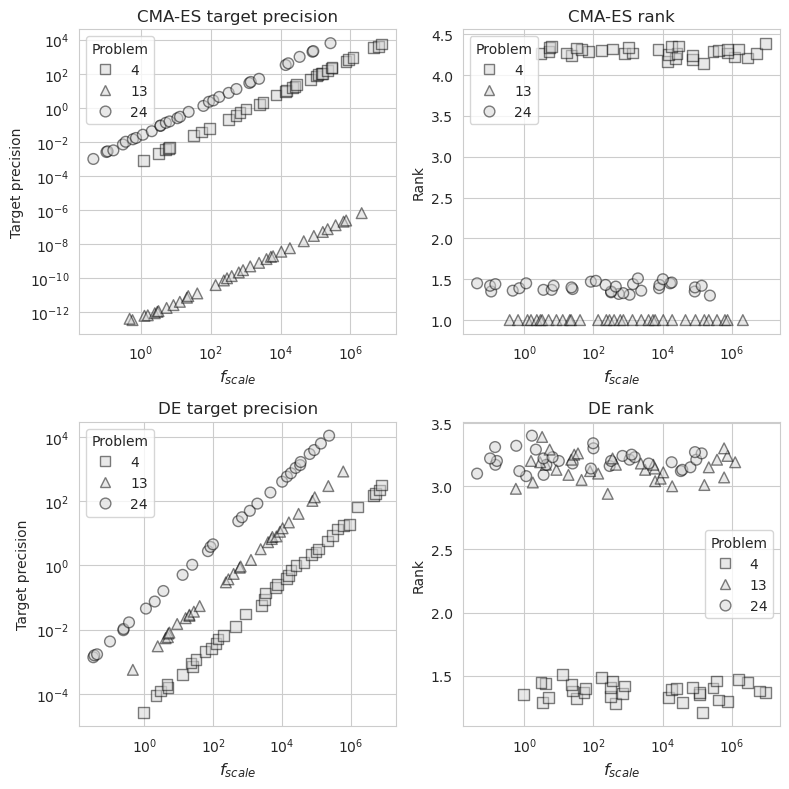

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("gray")

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

style_dict = {24: 'o', 4: 's', 13: '^'}
marker_kwargs = {
    'facecolor': 'lightgray',
    'edgecolor': 'black',
    'alpha': 0.5,
    's': 60,
    'linewidth': 1.0
}

sns.scatterplot(data=sdf.sort('CMAES_precision')[::3], y='CMAES_precision', x='y_max_minus_min',
                style='problem', ax=axs[0, 0], markers=style_dict, **marker_kwargs)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_title('CMA-ES target precision')
axs[0, 0].set_ylabel('Target precision')

sns.scatterplot(data=sdf.sort('CMAES_rank')[::3], y='CMAES_rank', x='y_max_minus_min',
                style='problem', ax=axs[0, 1], markers=style_dict, **marker_kwargs)
axs[0, 1].set_xscale('log')
axs[0, 1].set_ylabel('Rank')
axs[0, 1].set_title('CMA-ES rank')

sns.scatterplot(data=sdf.sort('DE_precision')[::3], y='DE_precision', x='y_max_minus_min',
                style='problem', ax=axs[1, 0], markers=style_dict, **marker_kwargs)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('DE target precision')
axs[1, 0].set_ylabel('Target precision')

sns.scatterplot(data=sdf.sort('DE_rank')[::3], y='DE_rank', x='y_max_minus_min',
                style='problem', ax=axs[1, 1], markers=style_dict, **marker_kwargs)
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylabel('Rank')
axs[1, 1].set_title('DE rank')

for ax in axs.flat:
    ax.set_xlabel(r"$f_{scale}$", fontsize=12)
    legend = ax.get_legend()
    if legend is not None:
        legend.set_title("Problem")

plt.tight_layout()

plt.savefig(f'figures/rank_vs_precision.pdf', bbox_inches='tight', pad_inches=0)

In [35]:
type(sdf)

polars.dataframe.frame.DataFrame

In [20]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
#sns.set_style("whitegrid")
#
## Define a style mapping for the 'problem' hue
#style_dict = {'24': 'o', '4': 's', '13': '^'}  # Adjust according to your dataset
#
#fig, axs = plt.subplots(2, 2, figsize=(10, 9))
#
#sns.scatterplot(
#    data=sdf, y='CMAES_precision', x='y_max_minus_min', 
#    style='problem', markers=style_dict, color='black', ax=axs[0, 0]
#)
#axs[0, 0].set_xscale('log')
#axs[0, 0].set_yscale('log')
#
#sns.scatterplot(
#    data=sdf, y='CMAES_rank', x='y_max_minus_min', 
#    style='problem', markers=style_dict, color='black', ax=axs[0, 1]
#)
#axs[0, 1].set_xscale('log')
#
#sns.scatterplot(
#    data=sdf, y='DE_precision', x='y_max_minus_min', 
#    style='problem', markers=style_dict, color='black', ax=axs[1, 0]
#)
#axs[1, 0].set_xscale('log')
#axs[1, 0].set_yscale('log')
#
#sns.scatterplot(
#    data=sdf, y='DE_rank', x='y_max_minus_min', 
#    style='problem', markers=style_dict, color='black', ax=axs[1, 1]
#)
#axs[1, 1].set_xscale('log')
#
#plt.savefig(f'figures/rank_vs_precision.pdf', bbox_inches='tight', pad_inches=0)

In [15]:
abc = asddf

NameError: name 'asddf' is not defined

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
def filter_scale(df, min_limit=None, max_limit=None):
    if min_limit is not None:
        df = df.filter(pl.col('y_max_minus_min')>min_limit)
    if max_limit is not None:
        df = df.filter(pl.col('y_max_minus_min')<max_limit)
    return df

In [ ]:
data = []

for problem_id in range(1,24):
    for ll, ul in [(1.0, 5.0), (0.5, 50.0), (0.05, 500.0), (None, None)]:
        train = df_joined.filter(pl.col('problem')!=problem_id)
        test = df_joined.filter(pl.col('problem')==problem_id)

        train = filter_scale(train, ll, ul)
        test = filter_scale(test, ll, ul)
        
        if len(test)==0 or len(train)==0:
            continue
        
        Y_train = train.select(sorted([c for c in train.columns if 'precision' in c]))
        X_train = train.select(['y_max_minus_min'])
        Y_test = test.select(sorted([c for c in train.columns if 'precision' in c]))
        X_test = test.select(['y_max_minus_min'])
        
        
        dummy_model = DummyRegressor(strategy='mean')
        rf_model = RandomForestRegressor(n_jobs=-1)

        dummy_model.fit(X_train, Y_train)
        dummy_preds = dummy_model.predict(X_test)

        rf_model.fit(X_train, Y_train)
        rf_preds = rf_model.predict(X_test)

        dummy_mae = mean_absolute_error(Y_test, dummy_preds)
        rf_mae = mean_absolute_error(Y_test, rf_preds)

        #print(dummy_mae, rf_mae, dummy_mae/rf_mae)
        
        data.append({
            'rf_mae': rf_mae,
            'dummy_mae': dummy_mae,
            'lim_filter': f'{ll}-{ul}'
        })

df = pl.DataFrame(data)
df

In [ ]:
df.group_by('lim_filter').mean()

In [ ]:
#train.filter(pl.col('y_max_minus_min')>0.7).filter(pl.col('y_max_minus_min')<2.0)

In [ ]:
#dfgsdg=sdfgdsfg

In [ ]:
data = []

for ll, ul in [(1.0, 5.0), (0.5, 50.0), (0.05, 500.0), (None, None)]:
    for r in range(10):
        for problem_id in range(1,24):
            for metric in ['precision', 'rank']:
                train = df_joined.filter(pl.col('problem')!=problem_id)
                test = df_joined.filter(pl.col('problem')==problem_id)

                train = filter_scale(train, ll, ul)
                test = filter_scale(test, ll, ul)
        
                if len(test)==0 or len(train)==0:
                    continue
                
                Y_train = train.select(sorted([c for c in train.columns if metric in c]))
                X_train = train.select(['y_max_minus_min'])
                Y_test = test.select(sorted([c for c in train.columns if metric in c]))
                X_test = test.select(['y_max_minus_min'])

                dummy_model = DummyRegressor(strategy='mean')
                rf_model = RandomForestRegressor(n_jobs=-1)

                dummy_model.fit(X_train, Y_train)
                dummy_preds = dummy_model.predict(X_test)

                rf_model.fit(X_train, Y_train)
                rf_preds = rf_model.predict(X_test)

                dummy_mae = mean_absolute_error(Y_test, dummy_preds)
                rf_mae = mean_absolute_error(Y_test, rf_preds)

                #print(metric, dummy_mae, rf_mae)
                data.append({
                    'error': dummy_mae,
                    'model': 'dummy',
                    'metric': metric,
                    'lim_filter': f'{ll}-{ul}'
                })
                data.append({
                    'error': rf_mae,
                    'model': 'rf',
                    'metric': metric,
                    'lim_filter': f'{ll}-{ul}'
                })
        
df = pl.DataFrame(data)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

df_prec = df.filter(pl.col('metric')=='precision').to_pandas()
sns.boxenplot(ax=axs[0], data=df_prec, x="model", y="error", hue="lim_filter")
axs[0].set_yscale('log')

df_prec = df.filter(pl.col('metric')=='rank').to_pandas()
sns.boxenplot(ax=axs[1], data=df_prec, x="model", y="error", hue="lim_filter")
#axs[1].set_yscale('log')

In [ ]:
v1 = df.filter(pl.col('model')=='dummy').filter(pl.col('metric')=='precision')
f1 = v1.group_by('lim_filter').mean().sort(['lim_filter'])
f1

In [ ]:
v2 = df.filter(pl.col('model')=='rf').filter(pl.col('metric')=='precision')
f2 = v2.group_by('lim_filter').mean().sort(['lim_filter'])
f2

In [ ]:
f1['error']/f2['error']

In [ ]:
#sdff=Sdfsf

In [ ]:
df.group_by(['model', 'metric', 'lim_filter']).mean().sort(['model', 'metric', 'lim_filter'])

In [ ]:
sns.boxenplot(data=df.to_pandas(), x="model", y="error", hue="metric")
plt.yscale('log')
plt.grid()
plt.savefig(f'figures/lpo_rank_vs_precision.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
df.group_by(['model', 'metric']).median()

In [ ]:
fdssdf=sdf

In [ ]:
dummy_model = DummyRegressor(strategy='mean')
rf_model = RandomForestRegressor(random_state=42)

dummy_model.fit(X_train, Y_train)
dummy_preds = dummy_model.predict(X_test)

rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)

dummy_mae = mean_absolute_error(Y_test, dummy_preds)
rf_mae = mean_absolute_error(Y_test, rf_preds)

print(dummy_mae, rf_mae)

In [ ]:
Y_train = train.select(sorted([c for c in train.columns if 'rank' in c]))
X_train = train.select(['y_max_minus_min'])
Y_test = test.select(sorted([c for c in train.columns if 'rank' in c]))
X_test = test.select(['y_max_minus_min'])

In [ ]:
dummy_model = DummyRegressor(strategy='mean')
rf_model = RandomForestRegressor(random_state=42)

dummy_model.fit(X_train, Y_train)
dummy_preds = dummy_model.predict(X_test)

rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)

dummy_mae = mean_absolute_error(Y_test, dummy_preds)
rf_mae = mean_absolute_error(Y_test, rf_preds)

print(dummy_mae, rf_mae)

In [ ]:
#dummy_preds

In [ ]:
plt.hist(np.log(list(train['y_max_minus_min'])), bins=100, alpha=0.7, label='Train data', color='blue')
plt.show()